# Huber Loss vs. Mean Squared Error in Regression Models

## Objective
In this notebook, we will explore the differences between Huber Loss and Mean Squared Error (MSE) as loss functions for regression models. Our focus will be on understanding how these loss functions perform in the presence of outliers, and how using Huber Loss can improve the robustness of regression models to noisy data.

### Loss Functions Overview:
- **Mean Squared Error (MSE)**: Penalizes larger errors more heavily, which can make models sensitive to outliers.
- **Huber Loss**: Combines the advantages of both MSE and Mean Absolute Error (MAE). It is less sensitive to outliers in data than MSE by combining quadratic and linear loss for different error magnitudes.

### Workflow:
1. Generate synthetic regression data with outliers.
2. Train two separate regression models using MSE and Huber Loss respectively.
3. Compare and visualize the performance of both models.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

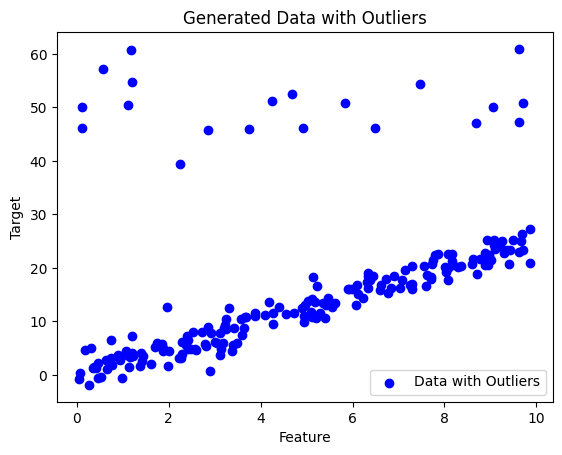

In [2]:
# Generate synthetic data
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 1) * 10  # Features between 0 and 10
y = 2.5 * X.squeeze() + np.random.randn(n_samples) * 2  # Linear relation with some noise

# Add outliers
n_outliers = 20
X[:n_outliers] = np.random.rand(n_outliers, 1) * 10
y[:n_outliers] = 50 + np.random.randn(n_outliers) * 5  # Outliers with much higher values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.scatter(X, y, color="blue", label="Data with Outliers")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Generated Data with Outliers")
plt.legend()
plt.show()

In [3]:
# Train a linear regression model using Mean Squared Error (MSE)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train a regression model using Huber Loss
huber = HuberRegressor()
huber.fit(X_train, y_train)
y_pred_huber = huber.predict(X_test)

# Calculate Mean Squared Error for both models
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_huber = mean_squared_error(y_test, y_pred_huber)

print(f"Mean Squared Error (Linear Regression with MSE): {mse_lr:.2f}")
print(f"Mean Squared Error (Huber Regression): {mse_huber:.2f}")


Mean Squared Error (Linear Regression with MSE): 109.15
Mean Squared Error (Huber Regression): 121.14


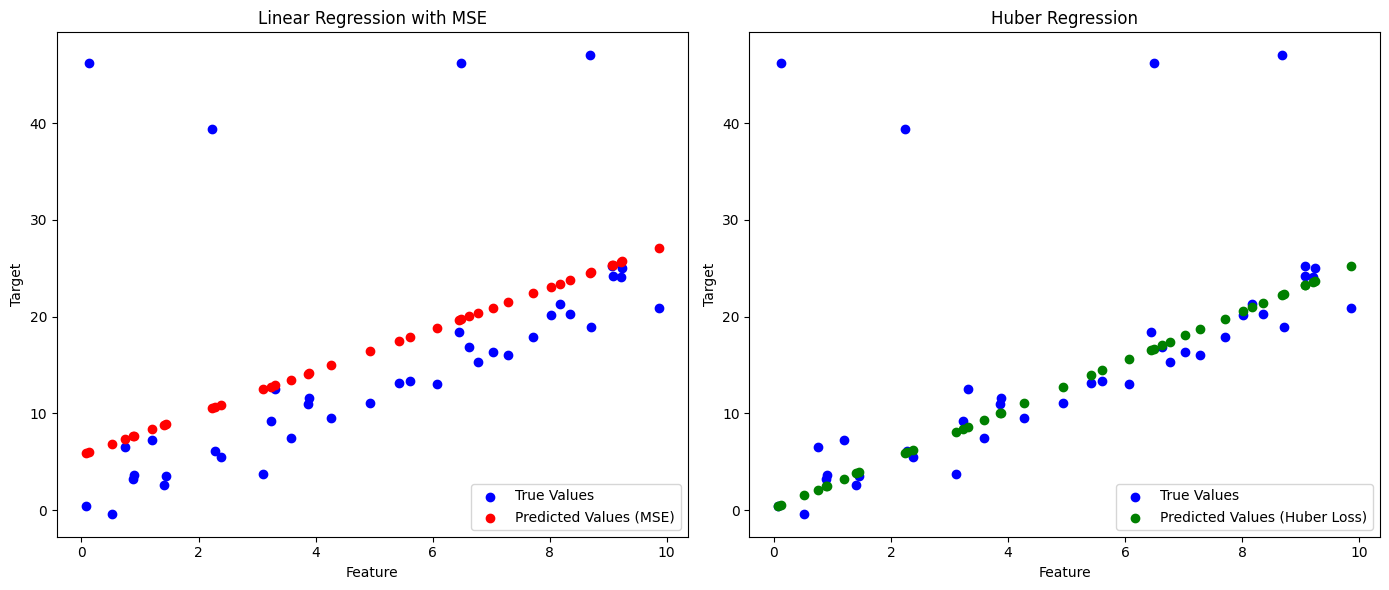

In [4]:
# Plot predictions vs true values
plt.figure(figsize=(14, 6))

# Linear Regression with MSE
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color="blue", label="True Values")
plt.scatter(X_test, y_pred_lr, color="red", label="Predicted Values (MSE)")
plt.title("Linear Regression with MSE")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

# Huber Regression
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color="blue", label="True Values")
plt.scatter(X_test, y_pred_huber, color="green", label="Predicted Values (Huber Loss)")
plt.title("Huber Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

plt.tight_layout()
plt.show()
